In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import albumentations as alb
from tqdm.notebook import tqdm

In [8]:
def all_files(path):
    files=[]
    img_path=os.path.join(path,'img')
    mask_path=os.path.join(path,'mask')
    for dir in os.listdir(img_path):
        full_img=os.path.join(img_path,dir)
        full_mask=os.path.join(mask_path,dir)
        files.append((full_img,full_mask))
    return files

In [9]:
files=all_files(r'D:\DL_DATA\ubfc_seg\lab\val')
np.random.shuffle(files)

In [10]:
augmentor=alb.Compose([
    alb.RandomBrightnessContrast(p=.5),
    alb.RandomGamma(p=.5),
    alb.RGBShift(p=.5),
    alb.Blur(blur_limit=3, p=0.2),
    alb.Rotate(limit=60,p=.4)
])

In [11]:
save_path=r'D:\DL_DATA\ubfc_seg\Mix\val' ####where to save

In [12]:
for i,(img_path,mask_path) in enumerate(tqdm(files)):
    name=img_path.split('\\')[-1].split('.')[0]
    img=cv2.imread(img_path)
    mask=cv2.imread(mask_path)
    
    for x in range(40):
        augmented=augmentor(image=img,mask=mask)
        
        os.makedirs(os.path.join(save_path,'img'),exist_ok=True)
        os.makedirs(os.path.join(save_path,'mask'),exist_ok=True)
        
        cv2.imwrite(os.path.join(save_path,'img',f'{name}.{x}.png'),augmented['image'])
        cv2.imwrite(os.path.join(save_path,'mask',f'{name}.{x}.png'),cv2.cvtColor(augmented['mask'],cv2.COLOR_BGR2GRAY))
    
    
    
    

  0%|          | 0/6 [00:00<?, ?it/s]

In [7]:
files=all_files(r'D:\DL_DATA\ubfc_seg\val_aug')
np.random.shuffle(files)

In [8]:
def visual_mask(mask):
    mask=np.uint8(mask*40)
    mask=cv2.cvtColor(mask,cv2.COLOR_BGR2GRAY)
    return mask

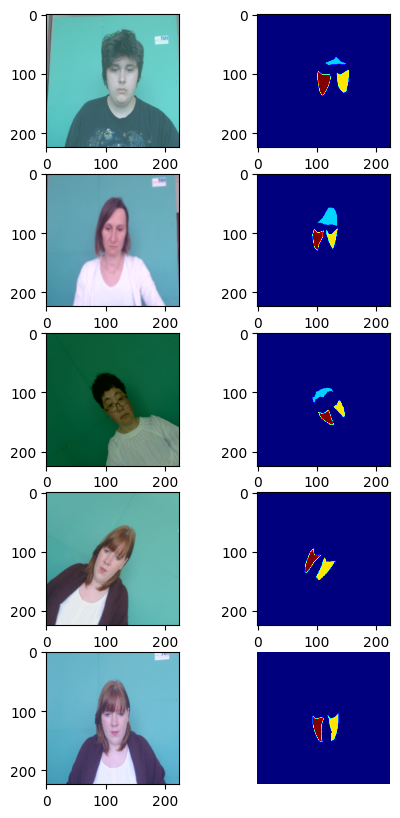

In [9]:
fig,axs=plt.subplots(5,2,figsize=(5,10))
for i in range(5):
    num=np.random.choice(range(0,len(files)))
    
    img=cv2.imread(files[num][0])
    mask=cv2.imread(files[num][1])
    view_mask=visual_mask(mask)
    
    
    axs[i][0].imshow(img[:,:,::-1])
    axs[i][1].imshow(view_mask,cmap='jet')
plt.axis('off')
plt.show()